In [1]:
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

The following Signal is a pure tonal CW(Continuous Wave) signal, Hence it is assumed to be a very narrowband signal.
10
50000 piece of data.


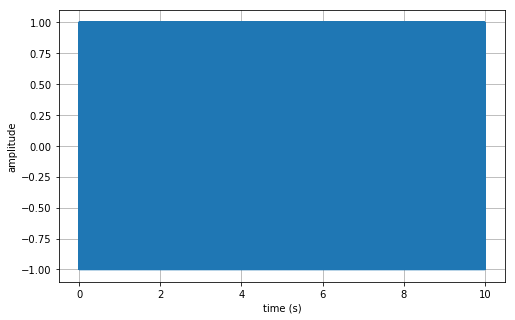

In [158]:
########## Signal Characteristics
print("The following Signal is a pure tonal CW(Continuous Wave) signal, Hence it is assumed to be a very narrowband signal.")
freq = float(input("Signal's fc in kHz: "))

samplefreq = 5.0*10**3 #Hz
T = 10 #1/(BW*10**3) # time (seconds)
print(T)
num_samples = int(T*samplefreq)

x = np.linspace(0,T,num_samples,endpoint = False)

def CWsinewave(x,freq):
    freq = freq*10**3 #Hz
    y = np.sin(2 * np.pi * freq * x + (np.pi/2)) #* np.cos(np.pi *x + (np.pi/2))
    return y

Tx = CWsinewave(x,freq)
        
print (len(Tx), "piece of data.")
#test = np.fft.fft(Tx)
#plt.subplot(2,1,2)
#plt.plot(np.linspace(0,len(test),len(test)),test)
#plt.subplot(2,1,1)
plt.plot(x, Tx)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.rcParams["figure.figsize"] = (8,5)
plt.grid(True)
plt.show()

7835  piece of data


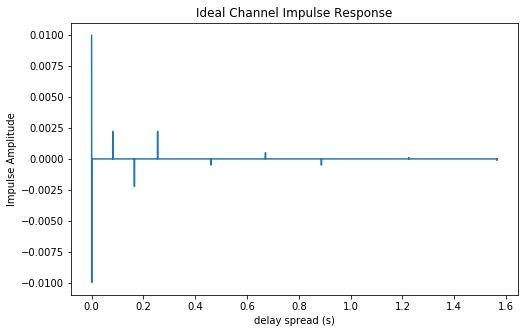

In [167]:
######### Channel Characteristics
h,r,d1,d2 = map(float,input("Channel Characteristics: Height, Range, d1 and d2 (meters): ").split())
f = freq
eigen = int(input("Number of eigenpath: "))
distance = 0
# Concerned Variables
def findDistance(h,r,d1,d2,s,b):
	global distance
	if s>b or s==b:
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	if b>s:# or s==b:
		distance = np.sqrt(r**2+((2*b*h)-d1-((-1)**(s-b))*d2)**2)
	return distance

def findlss(r):
	lss = 0
	lss =  1.0/r
	return lss

def findAngle(h,r,d1,d2,s,b):
	angle = 0
	if s>b:
		angle = 180*np.arctan2(r,((2*b*h)+d1-((-1)**(s-b))*d2))/np.pi
	if b>s:
		angle = 180*np.arctan2(r,((2*b*h)-d1+((-1)**(s-b))*d2))/np.pi
	if s==0 and b==0:
		angle = 0
	return angle

def findlb (angle,s,b):
	lb = 0
	m = (1500.0/1023)
	n = (1539.0/1650)
	lb = np.absolute((m*np.cos(np.pi*angle/180.0)-np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j))/(m*np.cos(np.pi*angle/180.0)+np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j)))
	return lb

def findla (f, distance):
	la = 0
	salinity = 35 #value search on internet based on salinity in singapore
	ft = 21.9*10**(6-1520/273+26) #divided by Ocean Temp which is 26 celsius for shallow water about 70m deep
	la = np.exp(-0.998*distance*(((salinity*(2.34*10**-6)*ft*f)/(ft**2+f**2))+(((3.38*10**-6)*f**2)/(ft))))
	return la

def findSamples(tao,distance1, distance2):
	global d
	tao = (distance1 - distance2)/1500 #speed of sound underwater m/s
	d += round(tao*samplefreq,0) #time x sampling frequency = number of samples !!!! DOES NOT MAKE SENSE?
#	print("value of d", d)
	samples.append(int(d))
	return tao, d

def rayModelling(Tx,eigen,distanceD):
	tao,s,b,e = [0,0,0,0]
	global distance, d
	for j in range (int(eigen/3)+1):
		for i in range (3):
#			print("s", s, "b",b)
			if eigen == e:
				break
			e += 1
			findDistance(h,r,d1,d2,s,b)
			findAngle(h,r,d1,d2,s,b)
			findla(f, distance)
			Bj = lss*la*(findlb(angle,s,b)**b)*1 # Direct Delta function
			if s%2!=0:
				Bj = -Bj
			Bja.append(Bj)
			findSamples(tao,distance, distanceD)
#			print("distance", distance)
#			print("value of d in loop", d)
#	print("s", s, "b",b)
# to change the s and b values
			if i == 0 or i == 2:
				s+= 1
			elif i == 1:
				s-= 1
				b+= 1        
	return Bja, distance, d

findlss(r)
distanceD = findDistance(h,r,d1,d2,0,0)

# Ray Modelling (non-recursive)
Bja = []
samples = []
d = 0
rayModelling(Tx,eigen,distanceD)

# Creating the Impulse Response
Hn = np.zeros(int(d)+10)
j = 0
k = 0
#print(samples)
#print(Bja)
#print(d)
#print("len of Hn", len(Hn))
while j <= int(d):
    if j == samples[k]:
        Hn[j] = Bja[k]
#        print("value of samples[k]: ", samples[k])
#        print("value of Hn[j]: ", Hn[j])
#        print(k)
        k += 1
#        print(k)
        if k == len(samples):
            break
        if samples[k]==samples[k-1]:
             k+=1
#            print("hello")
    j += 1

x_axis = np.zeros(int(d))


Hnfft = np.abs(np.fft.fft(Hn))

# Plotting the impulse Response
#print ("Impulse Response:", Bja)
print(len(Hn)," piece of data")
plt.title('Ideal Channel Impulse Response')
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel("delay spread (s)")
plt.ylabel("Impulse Amplitude")
#plt.subplot(2,1,1)
plt.plot(np.linspace(0,len(Hn)/samplefreq,len(Hn)),Hn)
#plt.subplot(2,1,2)
#plt.plot(np.linspace(0,len(Hnfft)/T,len(Hnfft)),Hnfft)

plt.show()

## NOTE: try to plot Tao agains horizontal range to observe something cool
## NOTE: try to add up the impulse response when the two collide as one delay spread axis.


57834


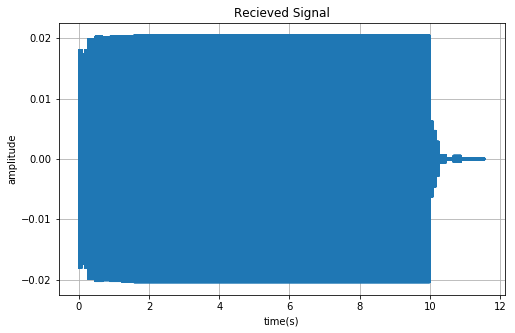

In [169]:
####### Convolution in order to get RECEIVED Signal
s1 = Tx 
s2 = Hn

Rx = []
Rx = signal.fftconvolve(s1,s2,mode = "full")

# Noise Added
mean = 0
std = 0.01
white_noise = np.random.normal(mean, std, size=len(Rx))

#Rx += white_noise

# Plotting the model
#print ("Final signal: ", Rx)
x_axis = np.linspace(0,len(Rx)/samplefreq,len(Rx))
print(len(Rx))
plt.title('Recieved Signal')
plt.grid(True)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.plot(x_axis, Rx)
plt.show()


In [ ]:
## This cell is to truncate the transient part of the recieved signal, and look at the  maximum value and plot
## accordingly with my fc value.

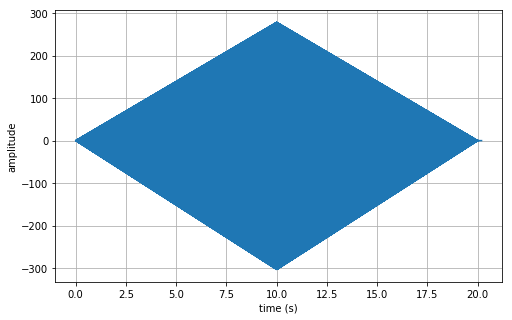

In [116]:
########## Correlating Received Signal with Pilot Input Signal to identify Impulse Signal

checkingImpulseResponse = np.correlate(Rx,Tx,"full") #has to correlate Rx with Tx not the other way around.


plt.grid(True)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.plot(np.linspace(0,len(checkingImpulseResponse)/samplefreq,len(checkingImpulseResponse)),checkingImpulseResponse)
plt.show()

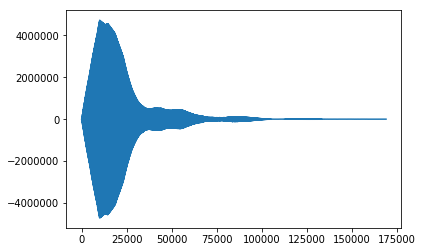

In [114]:
### Convolution to get reconstrcuted Signal

MessageSignal = np.convolve(checkingImpulseResponse,Rx)

#Amplification of the signal
MessageSignal = 20*MessageSignal

plt.plot(MessageSignal)
plt.show()


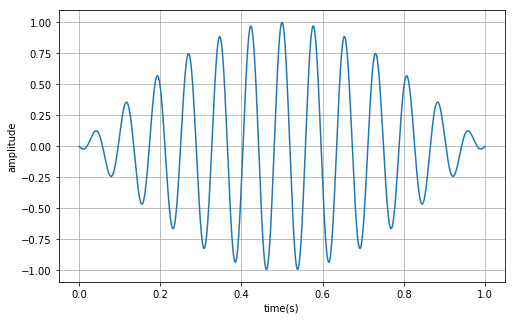

In [210]:
def CWsinewave(samplefreq):
    freq = 13#*10**3 #Hz

    x = np.arange(0,1,1.0/samplefreq)
    y = np.sin(2 * np.pi * freq * x + (np.pi/2)) * np.cos(np.pi *x + (np.pi/2))

    return y



x = CWsinewave(samplefreq)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.grid(True)
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(np.linspace(0,len(x)/samplefreq,len(x)),x)
plt.show()

In [170]:
# Pilot Signal
selector = int(input("Enter type of waves: Gaussian (0), Sine(1), Cosine(2), Square(3) (running for 10 seconds): "))

correct = True
while(correct == True):
	if selector == 0:
		a,b,c = map(float,input("input parameters for the gaussian curve (scalar, mean, variacne):").split())
		gaussian = a*np.exp(-((x-b)**2)/2*c**2)
		Tx = gaussian
	elif selector==1:
		a,b,c = map(float,input("input parameters for the sine curve(amplitude, frequency(kHz), phase): ").split())
		sine = a*np.sin(x*(b*10**3)-c)
		Tx = sine
	elif selector==2:
		a,b,c = map(float,input("input parameters for the cosine curve (amplitude, frequency(kHz), phase): ").split()) 
		cosine = a*np.cos(x*(b*10**3)-c)
		Tx = cosine
	elif selector==3:
		x = np.linspace(0,t,num_samples)
		square = signal.square(2*np.pi*x)
		Tx = square
	else:
		Tx = 1
 

check = input("is this the intended input wave? (Yes/No) ")

if(check == "yes" or check == "Yes"):
	correct = False
else:
	print("Please re-input the waves parameters.")
	correct = True
print("Proceeds to Channel with the following signal: ", Tx)


ValueError: not enough values to unpack (expected 3, got 1)